# Generating Synthetic Data for testing higher order polynomial models

In last class, we fit a linear (1st order polynomial) model to data we created. As discussed, we can also test higher order polynomial models. 

In this notebook, we create a 'hidden' second order polynomial relationship between the the input and target variables, and (like last time) add in some random noise to 'hide' the relationship.

## Initial setup

Let's import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1) # set this to ensure the results are repeatable. 
sample_size = 1000

### Let's define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [2]:
x1 = np.round(np.random.normal(0, 200.0, sample_size),2)
x2 = np.round(np.random.normal(10, 35.0, sample_size),2)
x3 = np.round(np.random.normal(100, 200.0, sample_size),2)
x4 = np.round(np.random.normal(30, 30.0, sample_size),2)

# we will define a linear model with the following parameter values (arguements)
b0 = 1 # intercept
b1 = -50.5 # slope of x1
b2 = 10.5 # slope of x2
b3 = 100.5 # slope of x3
b4 = -520.45 # slope of x4

# finally, the hidden relationship is... 
y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4

In [3]:
# let's 'hide' the model by adding in some noise
e = np.round(np.random.normal(0, 50.0, sample_size), 2)
Y = y + e

Let's plot this sample data using a scatter plot

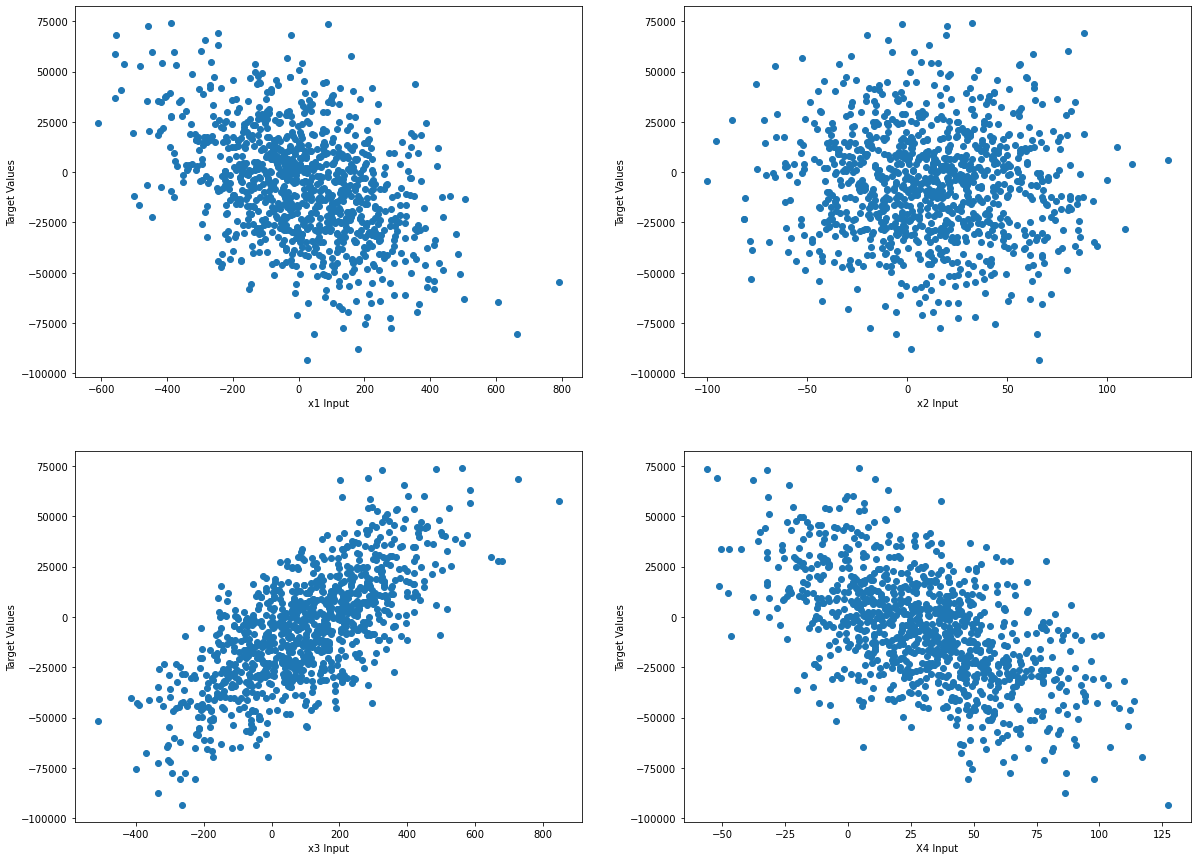

In [4]:
fig, ax = plt.subplots(2,2,figsize=(20, 15))

ax[0,0].scatter(x = x1, y = y)
ax[0,0].set_xlabel("x1 Input")
ax[0,0].set_ylabel("Target Values")

ax[0,1].scatter(x = x2, y = y)
ax[0,1].set_xlabel("x2 Input")
ax[0,1].set_ylabel("Target Values")

ax[1,0].scatter(x = x3, y = y)
ax[1,0].set_xlabel("x3 Input")
ax[1,0].set_ylabel("Target Values")

ax[1,1].scatter(x = x4, y = y)
ax[1,1].set_xlabel("X4 Input")
ax[1,1].set_ylabel("Target Values")

plt.show()

In [5]:
import pandas as pd

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'target': Y})
df

,x1,x2,x3,x4,target
0,324.87,4.64,197.90,27.69,-10885.5455
1,-122.35,-75.14,147.76,36.23,1391.7615
2,-105.63,27.78,10.38,59.59,-24327.8205
3,-214.59,-1.34,-22.16,72.98,-29347.3460
4,173.08,-42.89,-305.99,45.85,-63775.3025
...,...,...,...,...,...
995,-23.29,16.60,-54.38,26.22,-17679.7140
996,-455.46,29.63,-24.53,1.19,20256.5745
997,-13.92,-22.26,69.87,4.68,5017.6590
998,70.77,32.66,-180.00,48.85,-46689.6975


In [6]:
df.to_csv('class03_multivariable_dataset.csv', index=False)